In [1]:
from transformers import DistilBertTokenizer, DistilBertModel
from utils_data import *
from trainer import *
from tqdm import tqdm
import pandas as pd
import numpy as np
import torch

C:\Users\Lei\miniconda3\envs\Asset2Vec\lib\site-packages\neptune\common\warnings.py:62: NeptuneDeprecationWarning: The 'neptune-client' package has been deprecated and will be removed in the future. Install the 'neptune' package instead. For more, see https://docs.neptune.ai/setup/upgrading/
  warnings.warn(
C:\Users\Lei\miniconda3\envs\Asset2Vec\lib\site-packages\neptune\common\warnings.py:62: NeptuneDeprecationWarning: You're importing the Neptune client library via the deprecated `neptune.new` module, which will be removed in a future release. Import directly from `neptune` instead.
  warnings.warn(


In [3]:
embd = EmbeddingTrainer.load_from_checkpoint('checkpoints/04e2bf46-ee06-4065-9c6a-961f8856c30e.ckpt').embedder.cuda()

TypeError: EmbeddingTrainer.__init__() missing 1 required positional argument: 'n_mlp'

In [2]:
embeddings = EmbeddingTrainer.load_from_checkpoint('checkpoints/2bca5a3b-5bed-413a-95ae-145358baed00.ckpt').embed_dict.detach().numpy()

IndexError: list index out of range

In [ ]:
metadata = pd.read_csv('data/Top 2000/t2k_metadata.csv', index_col=0)

In [4]:
TOKENIZER = RobertaTokenizer.from_pretrained('tokenizer/')
metadata.loc['Description'] = metadata.loc['Description'].apply(
            TOKENIZER, max_length=512, return_tensors='pt', padding='max_length', return_attention_mask=True, is_split_into_words=False
        )

In [6]:
total_stocks = len(metadata.columns)
embeddings = pd.DataFrame(data=np.zeros((30, total_stocks)), columns=metadata.columns)

for stock in tqdm(metadata.columns, total=total_stocks):
    desc = metadata.loc['Description', stock]
    embeddings[stock] = embd(desc['input_ids'].cuda(), desc['attention_mask'].cuda()).detach().cpu().numpy()[0]

100%|██████████| 1961/1961 [00:14<00:00, 133.76it/s]


In [7]:
from sklearn.decomposition import PCA
m = PCA(n_components=2)
reduced = m.fit_transform(embeddings).T
reduced = pd.DataFrame(data=reduced, columns=metadata.columns)

In [8]:
reduced.head()

,A,AA,AAL,AAON,AAP,AAPL,AAT,AAWW,AB,ABBV,...,ZETA,ZI,ZION,ZIP,ZM,ZNTL,ZS,ZTS,ZUO,ZWS
0,-0.521718,-0.155166,-0.177126,1.534839,-0.667313,1.077124,1.555011,0.991211,0.430995,1.121209,...,0.015401,1.349990,-0.214747,0.744835,0.182494,0.716644,0.956981,-0.411642,-0.732701,-0.238517
1,1.075001,-0.665512,0.149242,-0.287790,-1.163461,-0.367414,0.447254,0.137432,0.039657,-0.411989,...,-1.388441,0.172012,0.935178,-0.356261,-0.762912,0.980996,0.694361,-1.645002,1.575690,0.486408


<Axes: xlabel='0', ylabel='1'>

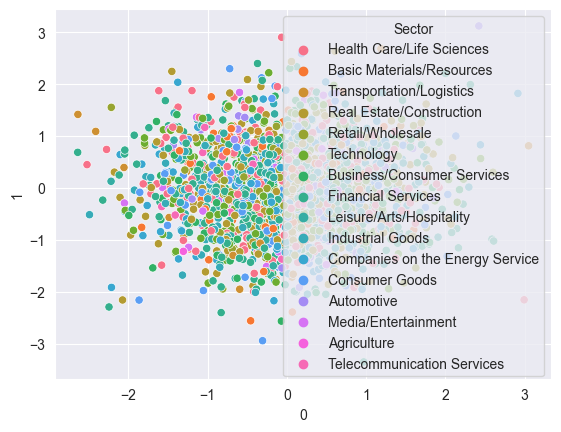

In [9]:
import seaborn as sns
sns.scatterplot(x=reduced.iloc[0], y=reduced.iloc[1], hue=metadata.loc['Sector'])

In [13]:
embeddings.to_csv('data/Top 2000/t2k_embeddings.csv')

In [10]:
embeddings = pd.DataFrame(embeddings.T, columns=metadata.columns)

In [12]:
dist = [sum(np.square(embeddings[stock] - embeddings['AAPL'])) for stock in embeddings.columns]
idx = np.argsort(dist)
embeddings.columns[idx][:10]

Index(['AAPL', 'CDNS', 'EVR', 'TEN', 'ATR', 'MBUU', 'UNM', 'CCOI', 'AMZN',
       'MDB'],
      dtype='object')

In [1]:
embeddings

NameError: name 'embeddings' is not defined